Juan Diego Gil Trujillo


Daniel Felipe Vélez Cuaical

Este es el valor máximo:  1.2
Este es el valor mínimo:  -1.2


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:202: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


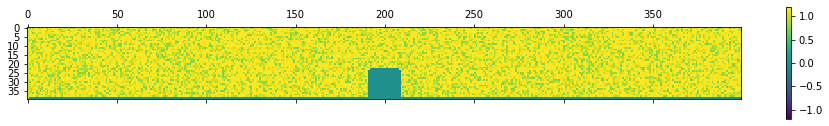

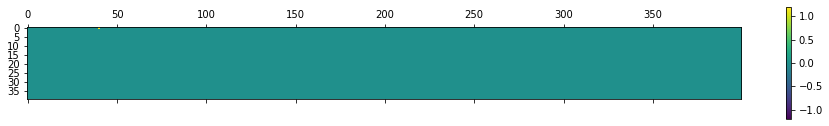

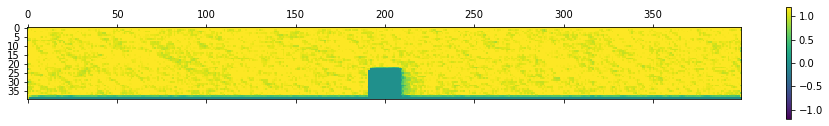

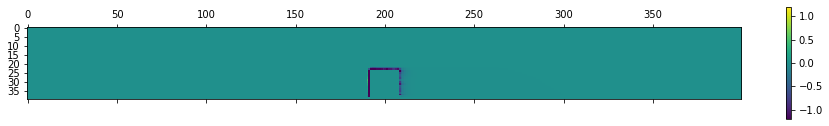

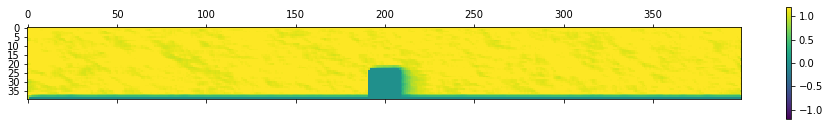

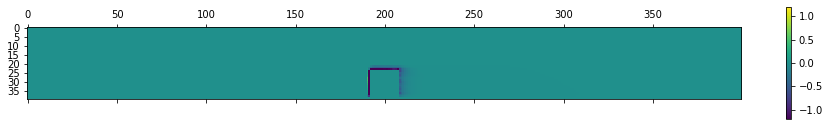

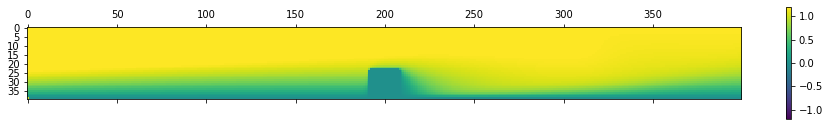

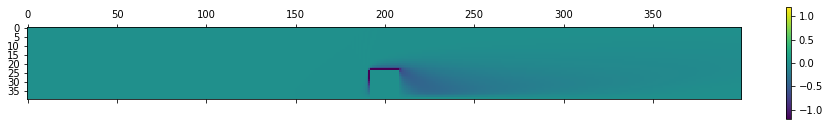

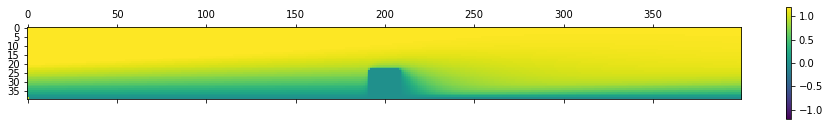

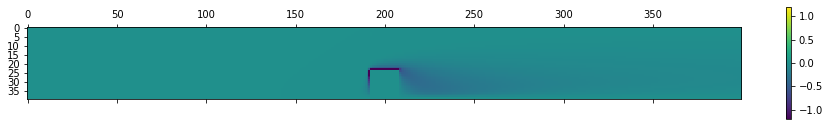

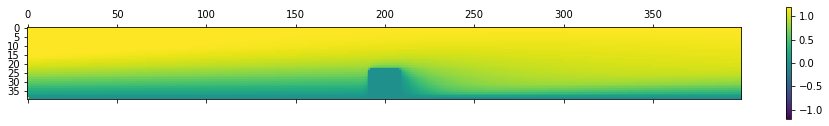

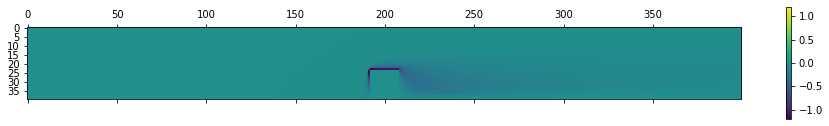

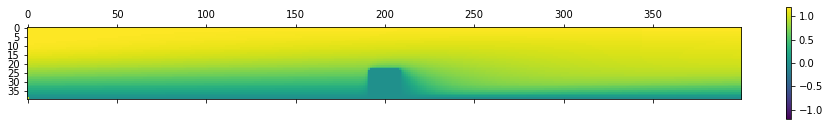

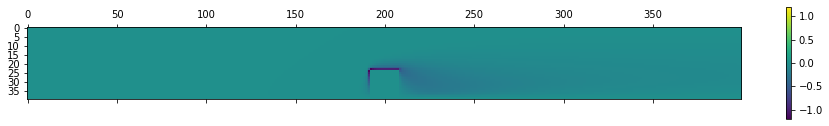

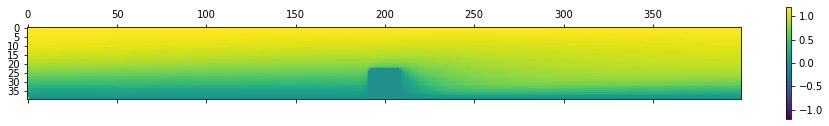

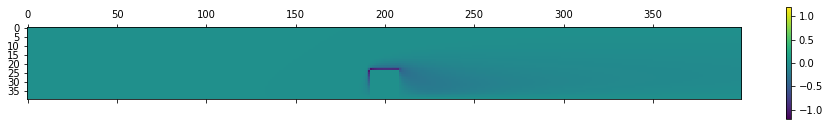

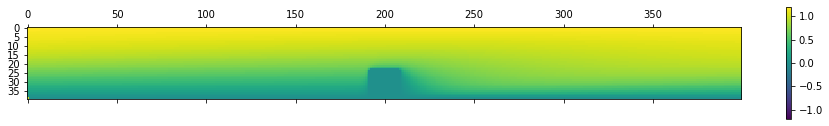

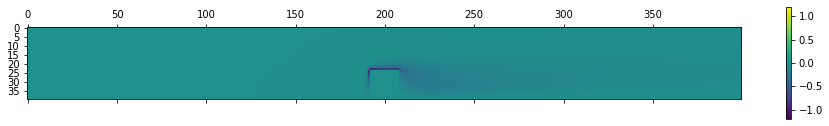

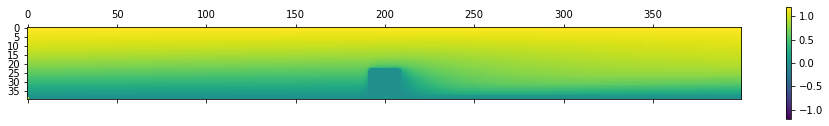

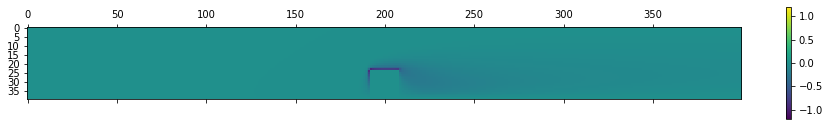

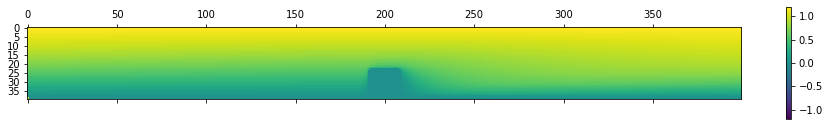

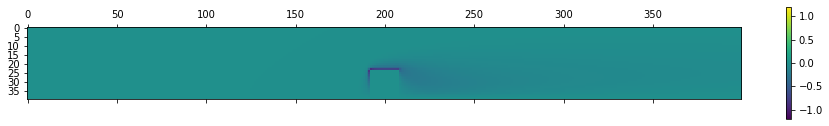

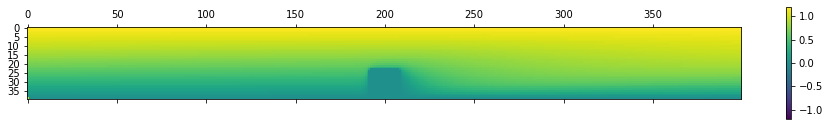

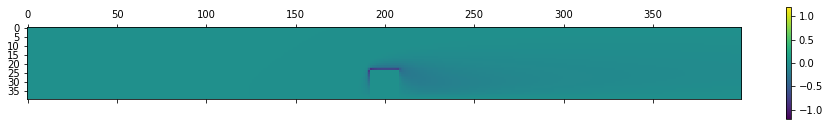

In [ ]:
from matplotlib.rcsetup import validate_color_or_auto
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

# LÓGICA DEL CÓDIGO

# Inserción de datos iniciales
tamanio = 40
n = 1000 # número de iteraciones
largo = 40
ancho = 400

V_0= 1.2 # velocidad 
vis = 0.5 #viscosidad
omega = 1 # valor del omega

# Dimensiones con base en los datos iniciales
mitadPilar = int(ancho/2) # Ubicación del la mitad del pilar en el espacio
alturaPilar = int((3*tamanio)/5)
radioPilar = int(tamanio/5) # Tamaño del radio

"""

"""

def imprimirEspacio(matriz):
  for i in range(largo):
    print(" | ", end = "")
    for j in range(ancho):
      print(matriz[i, j], end=" ")
    print(" | ")


# Función que da el valor de la correción residual
"""
   Nota: De hecho, el Vjplus (Vj+1) es Vjless (Vj-1) debido a las dimensiones con las que se maneje la matriz
   Es decir, lo que sería arriba (incremento en j o largo) sería abajo en la matriz, y viceversa,
   Lo que es abajo (o decremento en j o largo) sería arriba en la matriz
"""
def correccionResidualX(Vij, otroEjeV, Viplus, Viless, Vjplus, Vjless, presioniplus, presioniless, h):
  r = (1/4)*(Viplus+Viless+Vjplus+Vjless-((h/(2*vis))*Vij*(Viplus-Viless))-((h/(2*vis))*otroEjeV*(Vjplus-Vjless))-((h/(2*vis))*(presioniplus-presioniless)))-Vij
  return r

def correccionResidualY(Vij, otroEjeV, Viplus, Viless, Vjplus, Vjless, presioniplus, presioniless, h):
  r = (1/4)*(Viplus+Viless+Vjplus+Vjless-((h/(2*vis))*otroEjeV*(Viplus-Viless))-((h/(2*vis))*Vij*(Vjplus-Vjless))-((h/(2*vis))*(presioniplus-presioniless)))-Vij
  return r
  

# Función que se encarga de crear el pilar
def crearPilar(espacio):
  for j in range(mitadPilar-radioPilar, mitadPilar+radioPilar):
    for i in range (alturaPilar, tamanio):
      espacio[i, j] = 0


# Función que se encarga de actualizar los sectores de los lados del pilar
def actualizarEspaciosPilar(espacio,otroEspacioEje,eje,h):

  def definirVelocidadesLadoVertical():
    for j in range(mitadPilar-radioPilar, mitadPilar+radioPilar):
      if eje == "x":
        espacio[alturaPilar-1, j] = 0
      else:
        wEspecialHorizontal = (-2*(otroEspacioEje[alturaPilar-1-1, j] - otroEspacioEje[alturaPilar-1, j]))/(h*h)
        espacio[alturaPilar-1, j] = wEspecialHorizontal 


  def definirVelocidadesLadosHorizontal():
    for i in range(alturaPilar, largo-1):
      if eje == "x":
        espacio[i,mitadPilar-radioPilar-1]= 0
        espacio[i,mitadPilar+radioPilar]= 0
      else:
        wEspecialFrontal = (-2*(otroEspacioEje[i, mitadPilar-radioPilar-1-1] - otroEspacioEje[i, mitadPilar-radioPilar-1]))/(h*h)
        wEspecialTrasero = (-2*(otroEspacioEje[i, mitadPilar+radioPilar+1] - otroEspacioEje[i, mitadPilar+radioPilar]))/(h*h)
        espacio[i,mitadPilar-radioPilar-1]= wEspecialFrontal 
        espacio[i,mitadPilar+radioPilar]= wEspecialTrasero 

  definirVelocidadesLadoVertical()
  definirVelocidadesLadosHorizontal()
  

# Función que se encarga de proporcionar diversos valores en el espacio inicial
def crearEspacioInicial(matriz,a,b,eje):

  # Valores para los sectores de arriba del espacio inicial
  for i in range(largo):
    for j in range(1, ancho): # La primera columna no se modifica.
      matriz[i,j] = random.uniform(a,b)
      #[i][j] = 0

  # Valores para la velocidad de entrada
  for i in range(largo):
    if eje == "x":
      matriz[0,largo]=V_0
    else:
      matriz[0,largo]=0

  # espacio abajo
  for j in range(1, ancho): 
    matriz[largo-1, j] = 0
  
  # Inserción del pilar
  crearPilar(matriz)

  # Velocidad inicial en el lado de arriba del pilar
  for j in range(mitadPilar-radioPilar, mitadPilar+radioPilar):
    matriz[alturaPilar-1, j] = 0

  # Velocidad inicial en los lados frontal y trasero del pilar 
  for i in range(alturaPilar, largo):
    matriz[i, mitadPilar-radioPilar-1] = 0
    matriz[i, mitadPilar+radioPilar] = 0
                                         
                                                
# Función que se encarga de aplicar las ecuaciones de Navier-Stokes
def espacioActualizado(espacio,espacioOtroEje,eje,w):
  
  def espacioActualizadoCentrado(espacio):
    for j in range(1, ancho-1):
      for i in range(1, largo-1):
        if not(j>=mitadPilar-radioPilar-1 and j<= mitadPilar+radioPilar and i>=alturaPilar-1) or ((j==mitadPilar-radioPilar-1 or j==mitadPilar+radioPilar) and i==alturaPilar-1):
          if eje == "x":
            espacio[i, j] = espacio[i, j]+(w*
                  correccionResidualX(espacio[i, j], espacioOtroEje[i,j], espacio[i, j+1], espacio[i, j-1], espacio[i-1, j], espacio[i+1, j], 1, 1, 1))
          else:
            espacio[i, j] = espacio[i, j]+(w*
                   correccionResidualY(espacio[i, j], espacioOtroEje[i,j], espacio[i, j+1], espacio[i, j-1], espacio[i-1, j], espacio[i+1, j], 1, 1, 1))
          
  
  def inletf(espacio):
    for i in range(0,largo-1):
      if eje == "x":
        espacio[i, 0] = espacio[i, 1]
      else:
        espacio[i, 0] = 0

  def outletf(espacio): # Aquí Viplus vale Vij y V = CTE.
    for i in range(1, largo-1): 
      espacio[i, ancho-1] = espacio[i, ancho-2]

  
  def surfaceg(espacio):# Aquí Vjless vale Vij y no se presentan modificaciones, es decir, V = cte.
    for j in range(1, ancho):
      if eje == "x":
        espacio[0, j] = V_0
      else:
        espacio[0, j] = 0

  def lineea(espacio): # Aquí Vjplus vale Vij y la velocidad es cero.
    for i in range(1, ancho-1): 
      espacio[largo-1, i] = 0


  
  actualizarEspaciosPilar(espacio,espacioOtroEje,eje,1) # Para insertar las velocidad de los lados del pilar
    

  inletf(espacio)
  outletf(espacio)
  surfaceg(espacio)
  lineea(espacio)
  espacioActualizadoCentrado(espacio)

############################################################################################################## 

# Creación de las matrices
espacioCopiaX = np.ones((largo, ancho))

espacioCopiaY = np.zeros((largo,ancho))

# Espacio con valores originales
crearEspacioInicial(espacioCopiaX,V_0-0.5,V_0+0.5,"x")
crearEspacioInicial(espacioCopiaY,0,0,"y")



################################################################################################################
# GRAFICAR

# Zona del código que se encarga de hallar el valor más grande y más pequeño de todo el espacio
ValorMaximo = 0
ValorMinimo = 1
for i in range(largo):
  for j in range (ancho):
    if(espacioCopiaX[i][j]>ValorMaximo):
      ValorMaximo = espacioCopiaX[i][j]
    if(espacioCopiaX[i][j]<ValorMinimo and espacioCopiaX[i,j]!=0):
      ValorMinimo = espacioCopiaX[i][j]

ValorMaximo = V_0
ValorMinimo = -V_0
print("Este es el valor máximo: ",ValorMaximo)
print("Este es el valor mínimo: ",ValorMinimo)


# Función que se encarga de crear el gráfico inicial y la copia
def crearGrafico(espacioAGraficar):

  dfAGraficar = pd.DataFrame(espacioAGraficar)
  plt.matshow(dfAGraficar,vmin=ValorMinimo,vmax=ValorMaximo)
  plt.colorbar()
  #imsize = 5
  #plt.rcParams['figure.figsize'] = (imsize, imsize)

############################################################################################################
# IMPLEMENTACIÓN


# Y su gráfico
crearGrafico(espacioCopiaX)
crearGrafico(espacioCopiaY)



# Espacio aplicando ecuaciones de Navier-Stokes
espacioActualizado(espacioCopiaX, espacioCopiaY, "x", omega)
espacioActualizado(espacioCopiaY, espacioCopiaX, "y", omega)
# Y su gráfico
crearGrafico(espacioCopiaX)
crearGrafico(espacioCopiaY)



# Las n veces que se quiera iterar


for i in range(n):
  espacioActualizado(espacioCopiaX, espacioCopiaY, "x", omega)
  espacioActualizado(espacioCopiaY, espacioCopiaX, "y", omega)
  if i%100==0:
    crearGrafico(espacioCopiaX)
    crearGrafico(espacioCopiaY)

#imprimirEspacio(espacioCopiaX)
# Imprimir cada 300ava iteración


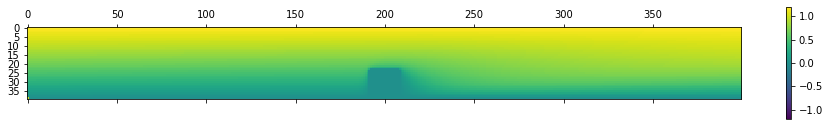

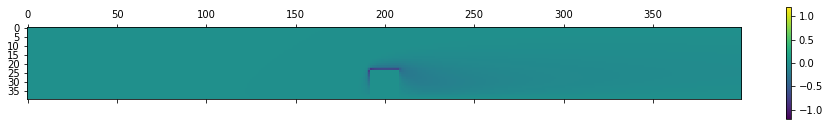

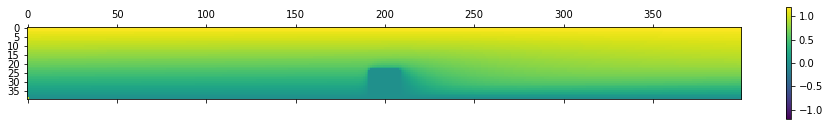

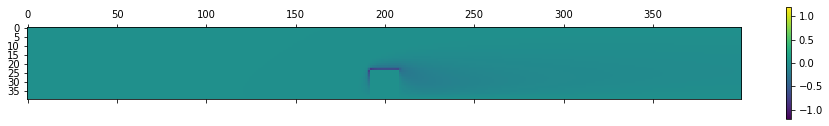

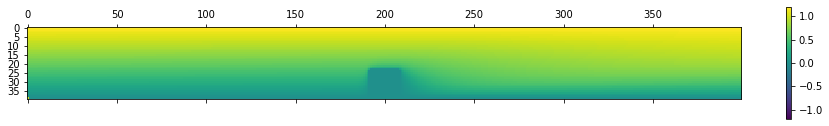

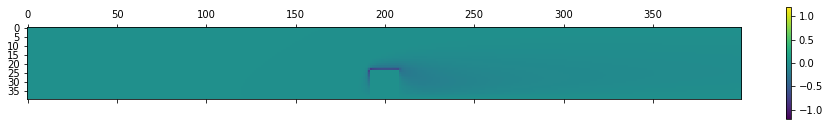

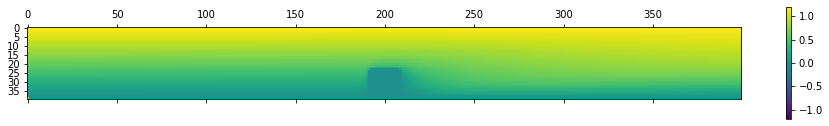

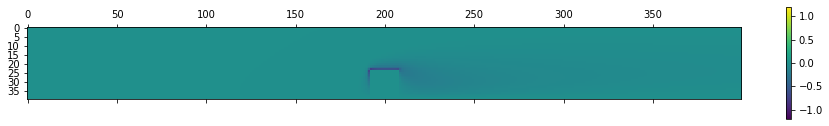

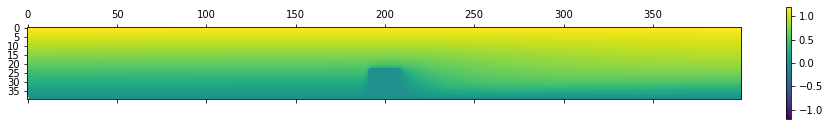

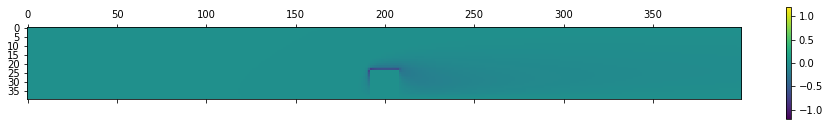

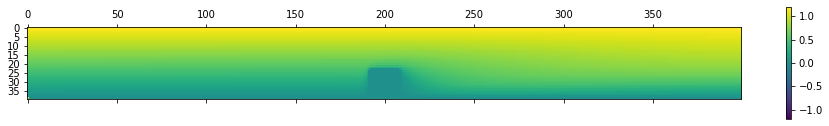

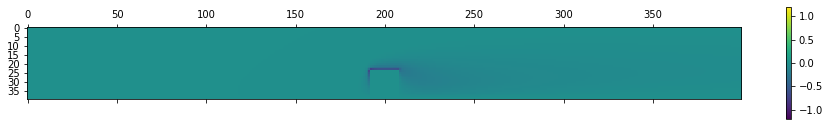

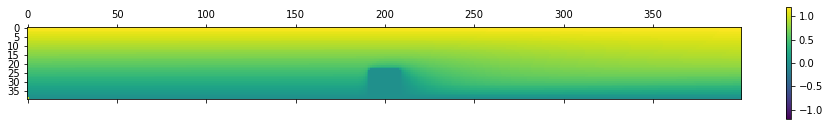

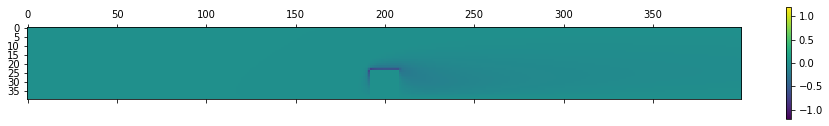

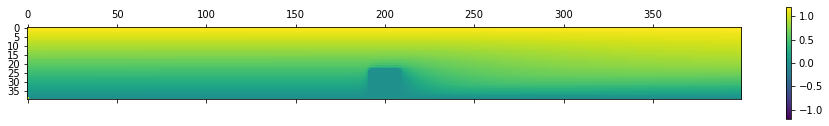

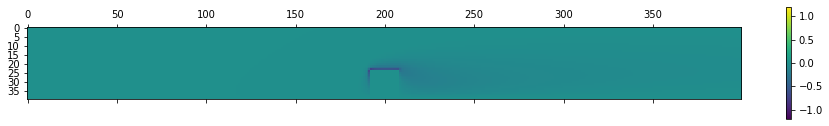

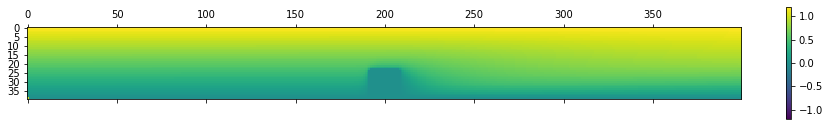

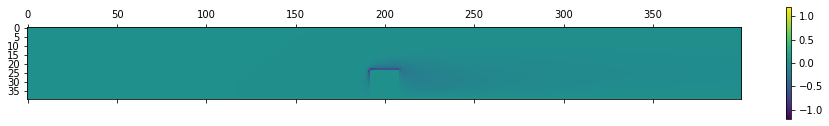

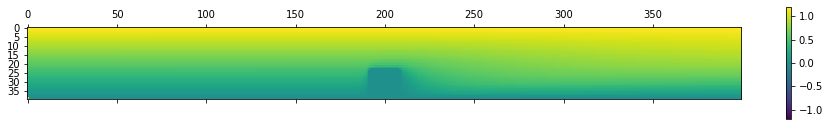

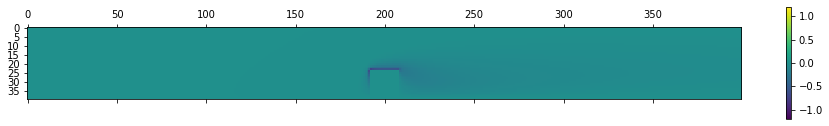

In [ ]:
for i in range(n):
  espacioActualizado(espacioCopiaX, espacioCopiaY, "x", omega)
  espacioActualizado(espacioCopiaY, espacioCopiaX, "y", omega)
  if i%100==0:
    crearGrafico(espacioCopiaX)
    crearGrafico(espacioCopiaY)

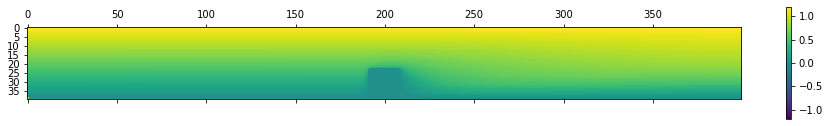

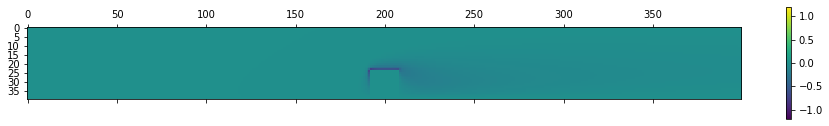

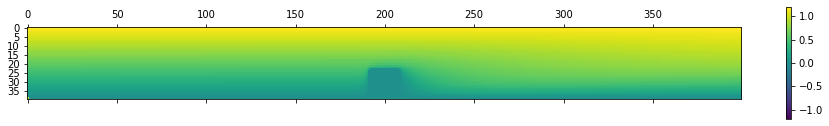

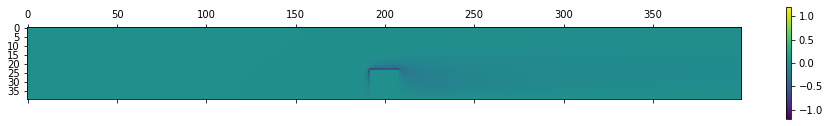

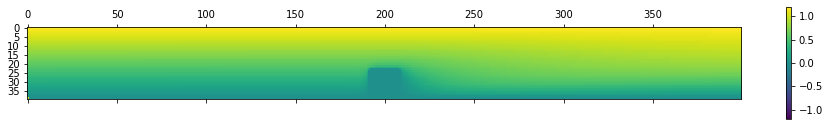

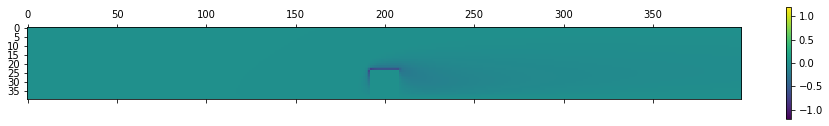

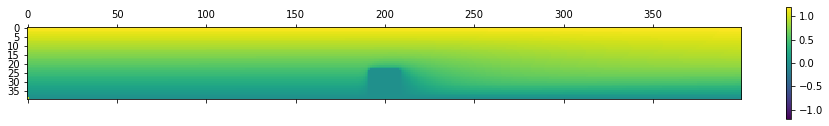

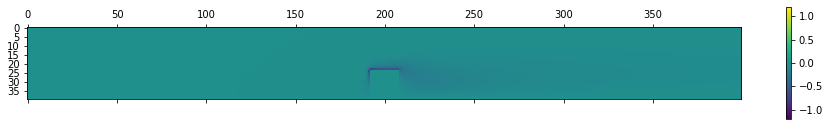

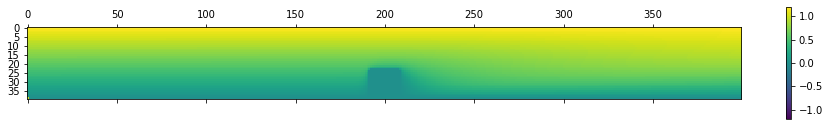

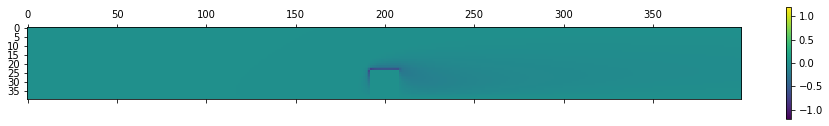

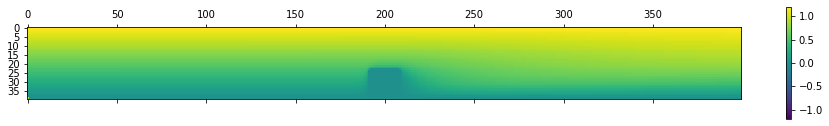

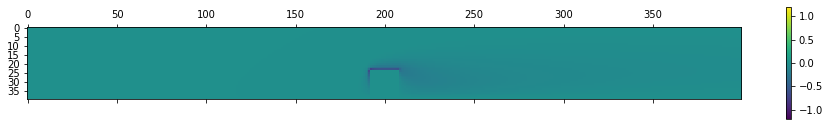

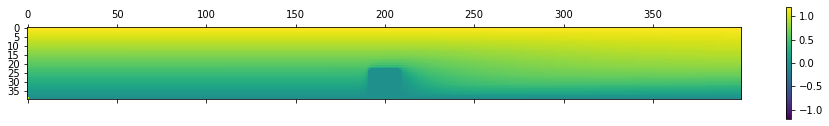

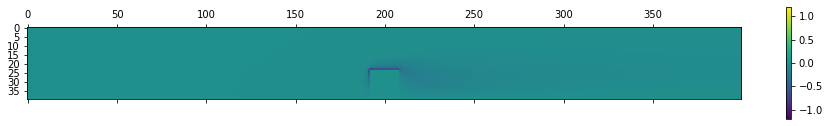

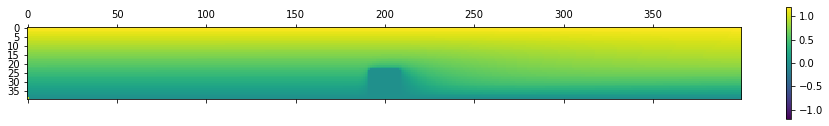

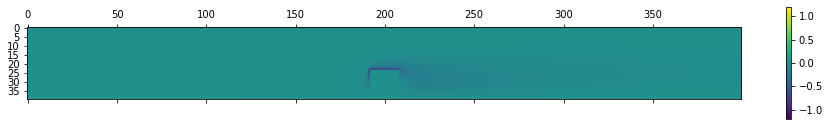

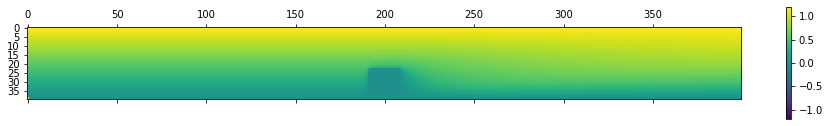

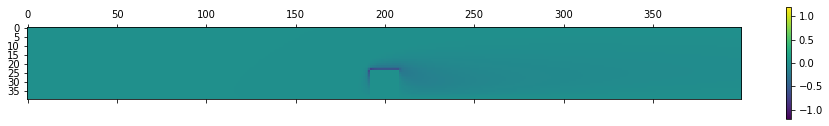

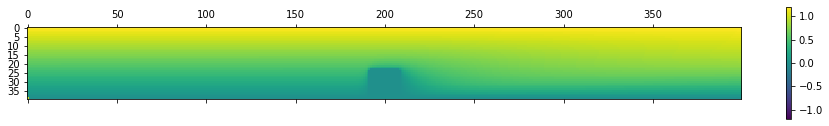

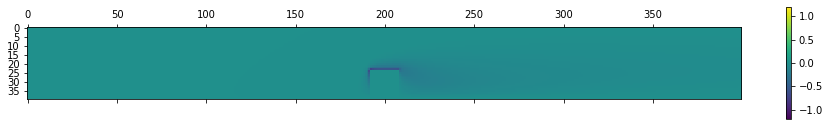

In [ ]:
for i in range(n):
  espacioActualizado(espacioCopiaX, espacioCopiaY, "x", omega)
  espacioActualizado(espacioCopiaY, espacioCopiaX, "y", omega)
  if i%100==0:
    crearGrafico(espacioCopiaX)
    crearGrafico(espacioCopiaY)

In [ ]:
import numpy as np 
import random
largo = 5
ancho = 7
arreglo1 = np.zeros((largo,ancho))

def loquesea(U):
  for i in range(largo):
    for j in range(ancho):
      U[i][j] =  666

print("Espacio original:")
print(arreglo1)
print("Espacio modificado")
loquesea(arreglo1)
print(arreglo1)




Espacio original:
[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]
Espacio modificado
[[666. 666. 666. 666. 666. 666. 666.]
 [666. 666. 666. 666. 666. 666. 666.]
 [666. 666. 666. 666. 666. 666. 666.]
 [666. 666. 666. 666. 666. 666. 666.]
 [666. 666. 666. 666. 666. 666. 666.]]


Descomposición SVD y QR

In [ ]:
from numpy.linalg import svd 

# El método para tener las matrices U, S y VT

A = np.array([[1,1,1], 
              [1,2,4], 
              [1,3,9],
              [1,4,10]])

U, S, VT = svd(A)


print("Left Singular Vectors:")
print(U)
print("Singular Values:") 
print(np.diag(S))
print("Right Singular Vectors:") 
print(VT)



Left Singular Vectors:
[[-9.21623377e-02 -8.09273350e-01 -2.25540381e-01 -5.34522484e-01]
 [-2.98973731e-01 -5.13444034e-01  6.42867709e-02  8.01783726e-01]
 [-6.27954626e-01  2.74471030e-01 -7.28243531e-01 -4.43450416e-16]
 [-7.12596519e-01  7.82145970e-02  6.43941074e-01 -2.67261242e-01]]
Singular Values:
[[15.17444955  0.          0.        ]
 [ 0.          1.25793079  0.        ]
 [ 0.          0.          0.39203453]]
Right Singular Vectors:
[[-0.11411862 -0.35746666 -0.92692747]
 [-0.77113285 -0.55638192  0.30950491]
 [-0.62636336  0.75010449 -0.21216075]]


In [ ]:
from sklearn.utils.extmath import randomized_svd 
A = np.array([[1,1,1], 
              [1,2,4], 
              [1,3,9],
              [1,4,10]])
u, s, vt = randomized_svd(A, n_components = 2)  # reduce to 2 features

print("Left Singular Vectors:")
print(u)

print("Singular Values:") 
print(np.diag(s))

print("Right Singular Vectors:") 
print(vt)

Left Singular Vectors:
[[ 0.09216234  0.80927335]
 [ 0.29897373  0.51344403]
 [ 0.62795463 -0.27447103]
 [ 0.71259652 -0.0782146 ]]
Singular Values:
[[15.17444955  0.        ]
 [ 0.          1.25793079]]
Right Singular Vectors:
[[ 0.11411862  0.35746666  0.92692747]
 [ 0.77113285  0.55638192 -0.30950491]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:376: FutureWarning: If 'random_state' is not supplied, the current default is to use 0 as a fixed seed. This will change to  None in version 1.2 leading to non-deterministic results that better reflect nature of the randomized_svd solver. If you want to silence this warning, set 'random_state' to an integer seed or to None explicitly depending if you want your code to be deterministic or not.
  FutureWarning,
